In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Read in the Clean Datasets:

In [60]:
train_df = pd.read_csv("../datasets/model_1_train.csv")
test_df = pd.read_csv("../datasets/model_1_test.csv")

### Check the clean data:

***Train***

In [61]:
train_df.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price,parcel_age
0,0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,3,2010,WD,130500,34
1,1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,4,2009,WD,220000,13
2,2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,1,2010,WD,109000,57
3,3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,174000,4
4,4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,3,2010,WD,138500,110


In [62]:
train_df.drop(labels=["Unnamed: 0"], axis=1, inplace=True)
train_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price,parcel_age
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,130500,34
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,220000,13
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,109000,57
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,174000,4
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,138500,110


***Test***

In [63]:
test_df.head()

,Unnamed: 0,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,parcel_age
0,0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,...,0,0,NaN,NaN,NaN,0,4,2006,WD,96
1,1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,8,2006,WD,29
2,2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,9,2006,New,0
3,3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2007,WD,84
4,4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,...,185,0,NaN,NaN,NaN,0,7,2009,WD,46


In [64]:
test_df.drop(labels=["Unnamed: 0"], axis=1, inplace=True)
test_df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,parcel_age
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,96
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,29
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,0
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,84
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,46


# Additional Cleaning for Additional Features:

In [65]:
def categ_check_replace_nan(df, lst):
    for i in range(len(lst)):
        if df[lst[i]].dtype == "int64":
            if df[lst[i]].isna().equals(df[lst[i]].isna()):
                df[lst[i]].fillna(0, inplace=True)
        elif df[lst[i]].dtype == "float64":
            if df[lst[i]].isna().equals(df[lst[i]].isna()):
                df[lst[i]].fillna(0, inplace=True)
        elif df[lst[i]].dtype == "O":
            if df[lst[i]].isna().equals(df[lst[i]].isna()):
                df[lst[i]].fillna("NA", inplace=True)
    return df

***Garage Variables:***

In [66]:
# Each garage column has the same # of nan, and same # of NA values
# Need to check to make sure these are all the same rows to be safe, before impute.

# train_df["garage_finish"].isna().equals(train_df["garage_cond"].isna()) # type & finish good to impute

In [67]:
# Got some help from: https://stackoverflow.com/questions/53842083/extract-column-names-based-on-key-words-pandas-df
garage_list = list(train_df.columns[train_df.columns.str.contains("garage")])

In [68]:
categ_check_replace_nan(train_df, garage_list)
categ_check_replace_nan(test_df, garage_list)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,parcel_age
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,96
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,29
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,0
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,84
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2007,WD,33
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,8,2008,WD,42
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2008,WD,40
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdWo,NaN,0,5,2007,WD,36


***Bsmt Variables***

In [69]:
bsmt_list = list(train_df.columns[train_df.columns.str.contains("bsmt")])

In [70]:
categ_check_replace_nan(train_df, bsmt_list)
categ_check_replace_nan(test_df, bsmt_list)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,parcel_age
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2006,WD,96
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,8,2006,WD,29
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,New,0
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2007,WD,84
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,185,0,NaN,NaN,NaN,0,7,2009,WD,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,1662,527377110,60,RL,80.0,8000,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2007,WD,33
874,1234,535126140,60,RL,90.0,14670,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,8,2008,WD,42
875,1373,904100040,20,RL,55.0,8250,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2008,WD,40
876,1672,527425140,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdWo,NaN,0,5,2007,WD,36


# Feature Engineering

### Dummies:

***Conditions 1 & 2***

In [71]:
train_df = pd.get_dummies(train_df, columns=["condition_1"])
test_df = pd.get_dummies(test_df, columns=["condition_1"])

***Garage Cond***

In [72]:
train_df = pd.get_dummies(train_df, columns=["garage_cond"])
test_df = pd.get_dummies(test_df, columns=["garage_cond"])

***Garage Qual***

In [73]:
train_df = pd.get_dummies(train_df, columns=["garage_qual"])
test_df = pd.get_dummies(test_df, columns=["garage_qual"])

***Neighborhoods***

In [74]:
# These 2 lines of code check the average number of appearances each unique value
# makes in the neighborhood column in both datasets. We can filter out the neighborhoods
# that appear under the mean amount of times to highlight the most frequent locations

# (train_df["neighborhood"].value_counts() > train_df["neighborhood"].value_counts().mean())
# test_df["neighborhood"].value_counts().mean()

# Below, the GrnHill and Landmrk neighborhoods appear few infrequently.
# Could be excluded for this model version?

In [75]:
# train_df = pd.get_dummies(train_df["neighborhood"])
# test_df = pd.get_dummies(test_df, columns=["neighborhood"])

In [76]:
train_df.shape

(2049, 100)

In [77]:
test_df.shape

(878, 98)

***Bsmt Quality***

In [78]:
train_df = pd.get_dummies(train_df, columns=["bsmt_qual"])
test_df = pd.get_dummies(test_df, columns=["bsmt_qual"])

***Bsmt Cond***

In [79]:
train_df = pd.get_dummies(train_df, columns=["bsmt_cond"])
test_df = pd.get_dummies(test_df, columns=["bsmt_cond"])

### Binarize:

***Central Air***

In [80]:
# For Train
train_df["central_air_dummy"] = [1 if i == "Y" else 0 for i in train_df["central_air"]]
train_df["central_air_dummy"].value_counts()

1    1908
0     141
Name: central_air_dummy, dtype: int64

In [81]:
# For Test
test_df["central_air_dummy"] = [1 if i == "Y" else 0 for i in test_df["central_air"]]
test_df["central_air_dummy"].value_counts()

1    823
0     55
Name: central_air_dummy, dtype: int64

### Engineer Columns

In [82]:
train_df["garage_age"] = train_df["yr_sold"] - train_df["garage_yr_blt"]
train_df["age_remod_add"] = train_df["yr_sold"] - train_df["year_remod/add"]

In [83]:
test_df["garage_age"] = test_df["yr_sold"] - test_df["garage_yr_blt"]
test_df["age_remod_add"] = test_df["yr_sold"] - test_df["year_remod/add"]

# Save Clean CSVs:

In [84]:
train_df.to_csv("../datasets/model_2_train.csv")
test_df.to_csv("../datasets/model_2_test.csv")

***Correlation & Heatmap based on current numeric columns***

In [85]:
train_df.corr()["sale_price"]

id                  -0.051360
pid                 -0.254465
ms_subclass         -0.087881
lot_frontage         0.342987
lot_area             0.296312
                       ...   
bsmt_cond_Po        -0.035870
bsmt_cond_TA         0.092099
central_air_dummy    0.277734
garage_age          -0.259213
age_remod_add       -0.551502
Name: sale_price, Length: 76, dtype: float64

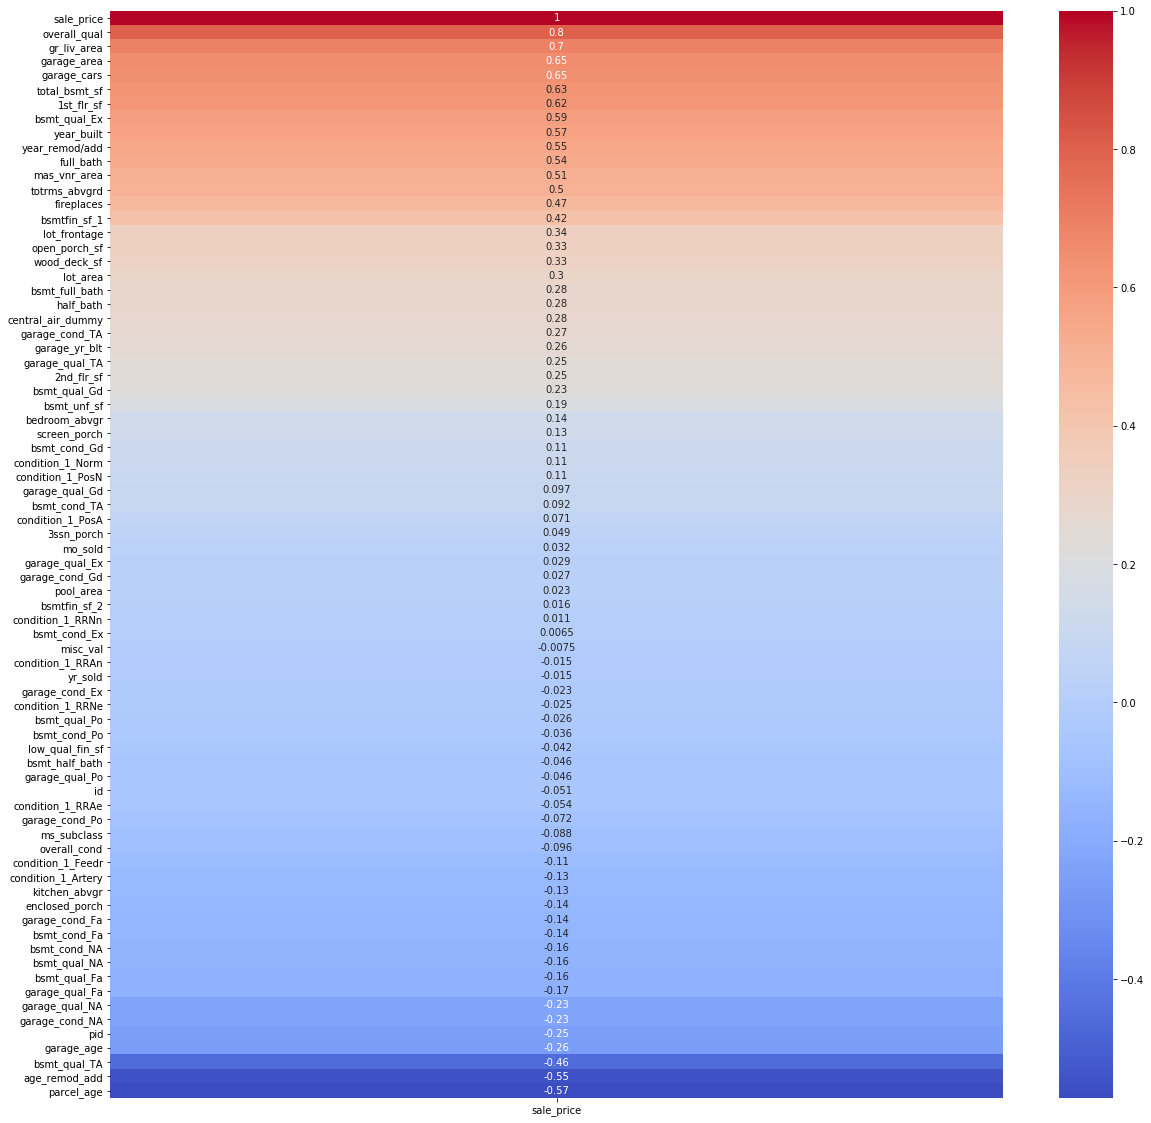

In [86]:
plt.figure(figsize=(20, 20))

sns.heatmap(train_df.corr()[
           ["sale_price"]].sort_values(by=["sale_price"], ascending=False),
           cmap="coolwarm",
           annot=True);

In [ ]:
train_df["con"]

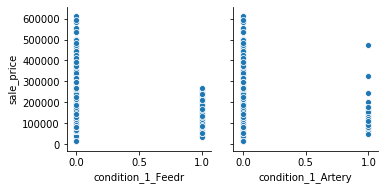

In [319]:
sns.pairplot(train_df, x_vars=["condition_1_Feedr", "condition_1_Artery"],
                       y_vars=["sale_price"]);

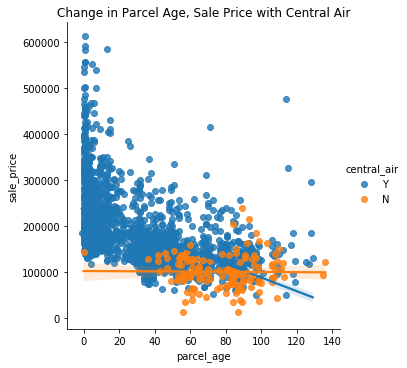

In [342]:
sns.lmplot(x="parcel_age", y="sale_price", hue="central_air", data=train_df)

plt.title("Change in Parcel Age, Sale Price with Central Air");

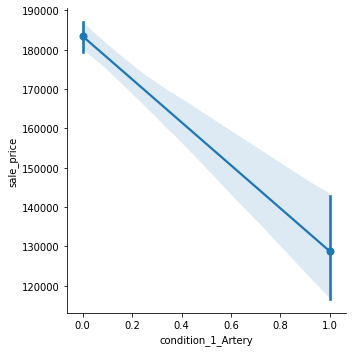

In [323]:
sns.lmplot(x="condition_1_Artery", y="sale_price", data=train_df, x_estimator=np.mean);

plt.title
# https://seaborn.pydata.org/tutorial/regression.html

# Model

In [207]:
# Below- .filter() to search the cols of the train_df 
# and returns a new DF of the cols containing those keywords.

garage_features = train_df.filter(like="garage_cond_")
bsmt_features = train_df.filter(like="bsmt_cond", axis=1)
condition_1_features = train_df.filter(like="condition_1_", axis=1)
additional_features = train_df[["central_air_dummy", 
                                "overall_qual", 
                                "gr_liv_area", 
                                "1st_flr_sf", 
                                "parcel_age", 
                                "age_remod_add"]]

In [208]:
# result = pd.concat([df1, df4], axis=1).reindex(df1.index)
X = pd.concat([garage_features,
               bsmt_features,
               condition_1_features, 
               additional_features],
               axis=1)
features = list(X.columns)
y = np.log(train_df["sale_price"])  
# ^^ Credit to Alex G and Zach for help implementing the log() on the target variable

***Instantiate***

In [221]:
lr = LinearRegression()

***Fit***

In [222]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [223]:
print(lr.coef_)
print(lr.intercept_)

[ 1.38957669e-01 -3.32155531e-02  1.18885514e-01 -6.01204954e-02
 -2.43443203e-01  7.89360690e-02  8.69970671e-02 -7.63376754e-02
  6.05559792e-02 -1.29691684e-01  4.54163899e-02  1.30599228e-02
 -4.30141281e-02 -1.15717712e-02  2.56507699e-02  1.08681665e-01
  1.00219735e-01 -4.79566102e-02 -2.46324372e-02 -6.91287122e-02
 -3.82485119e-02  1.17631094e-01  1.03091743e-01  2.41561520e-04
  1.57006358e-04 -1.68614007e-03 -2.35606005e-03]
10.758929423095953


# Eval

***Train/Test Split***

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [225]:
# train score
lr.score(X_train, y_train)  # Improved over model 1

0.8310948813284801

In [226]:
# test score
lr.score(X_test, y_test)  # Improved over model 1

0.8452831675863098

In [227]:
# cross val score
cross_val_score(lr, X_train, y_train, cv=5).mean()  # Improved over model 1

0.8169108845223532

### Residuals, Predictions

In [228]:
preds = np.exp(lr.predict(X_test))

In [229]:
resids = y_test - preds

In [232]:
print(f"MSE = {metrics.mean_squared_error(y_test, preds)}")
print(f"RMSE = {np.sqrt(metrics.mean_squared_error(y_test, preds))}")
print(f"R2 = {lr.score(X, y)}")

MSE = 36443058701.59023
RMSE = 190900.6513912151
R2 = 0.8347078126484355


In [291]:
df = pd.DataFrame({"Actual": np.exp(y_test), "Predicted": preds})
# ^^ Credit for helping to visualize this code: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

<Figure size 576x720 with 0 Axes>

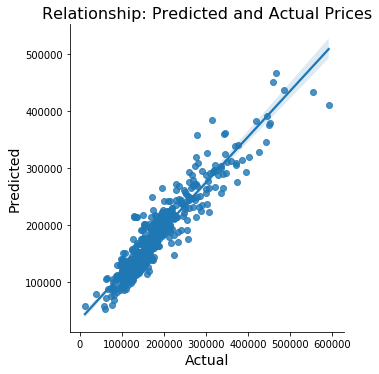

In [358]:
plt.figure(figsize=(8, 10), edgecolor="black");

sns.lmplot(x="Actual", y="Predicted", data=df)

plt.title("Relationship: Predicted and Actual Prices", fontsize=16)
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14);

In [302]:
df.reset_index(drop=True)

,Actual,Predicted
0,118000.0,110997.566202
1,302000.0,235709.630815
2,97000.0,130281.350492
3,137000.0,113439.383388
4,160000.0,166205.581298
...,...,...
508,124000.0,101988.955034
509,250000.0,232833.635933
510,139000.0,119393.729321
511,172500.0,158896.840368


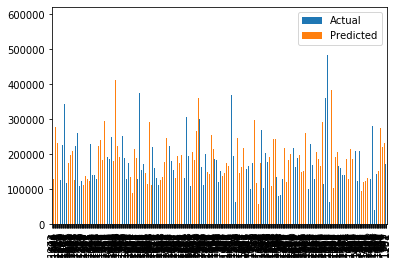

In [308]:
df.plot.bar();

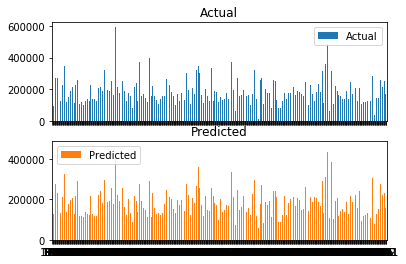

In [310]:
# Experimented with the Pandas documentation
axes = df.plot.bar(rot=0, subplots=True)
axes[1].legend(loc=2);

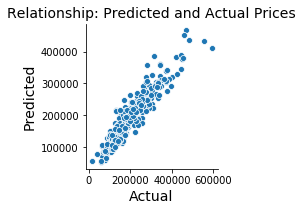

In [299]:
sns.pairplot(df, x_vars=["Actual"], y_vars=["Predicted"])

plt.title("Relationship: Predicted and Actual Prices", fontsize=14)
plt.xlabel("Actual", fontsize=14)
plt.ylabel("Predicted", fontsize=14);

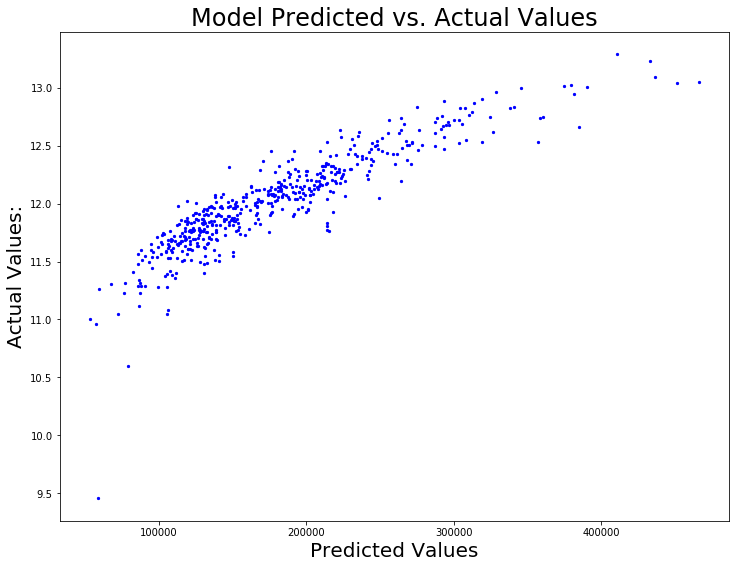

In [273]:
plt.figure(figsize=(12,9))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(preds, 
            y_test, 
            s=5, 
            color='blue',)

plt.xlabel("Predicted Values", fontsize = 20)
plt.ylabel("Actual Values:", fontsize = 20)
plt.title('Model Predicted vs. Actual Values', fontsize = 24);

## Residuals

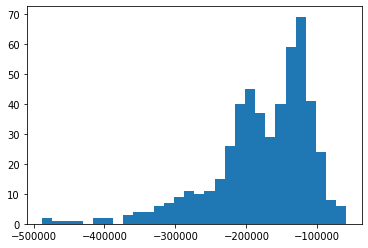

In [173]:
plt.hist(resids, bins=30);

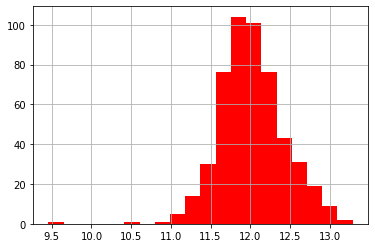

In [174]:
y_test.hist(bins=20, color="red");

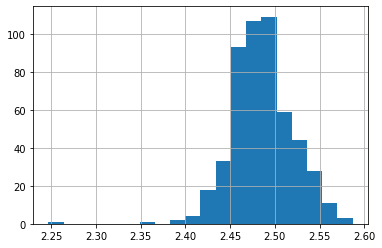

In [175]:
np.log(y_test).hist(bins=20);

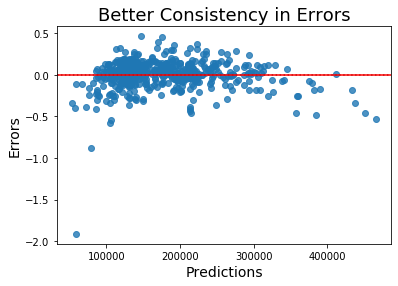

In [258]:
sns.residplot(preds, resids)
plt.axhline(0, color="red");

plt.title("Better Consistency in Errors", fontsize=18)
plt.xlabel("Predictions", fontsize=14)
plt.ylabel("Errors", fontsize=14);

In [231]:
np.mean(resids)

-178148.2481096357

# Interpretation:
- Due to the U-shape indicates that the model is only good for part of the data.

## Kaggle Model:

In [33]:
preds = np.exp(lr.predict(test_df[features]))

In [34]:
to_submit = pd.DataFrame()

In [35]:
to_submit["Id"] = test_df["id"]
to_submit["SalePrice"] = preds

In [36]:
to_submit.head()

,Id,SalePrice
0,2658,91827.928017
1,2718,194255.556666
2,2414,193211.545264
3,1989,127854.410604
4,625,161178.198458


In [37]:
to_submit.to_csv("../datasets/to_submit.csv", index=False)

### Kaggle RSME Score:

In [38]:
# Take 1: This model as engineered, no log of y
    # 34495.01031, which is an improvement of your previous score of 37430.04344.
# Take 2: This model as engineered, with log of y
    # 26494.65, huge improvement in the RMSE score in other iterations